In [13]:
from QAOA_simulator import QAOA_run
import networkx as nx
import qokit.maxcut as mc
import numpy as np
from matplotlib import pyplot as plt

# ランダムなイジング模型
def generate_random_ising_model(N: int):
    #h = np.random.rand(N)  # バイアス項の生成
    #J = np.random.rand(N, N)  # 結合項の生成（ここでは対称行列として生成）
    #J = (J + J.T) / 2  # 対称行列にする
    #np.fill_diagonal(J, 0)  # 対角要素を0にする（自己結合はないと仮定）
    #return {'h': h, 'J': J}
    J = []
    for i in range(N):
        for j in range(i+1, N+1):
            if i < j:
                rand_coef = np.random.uniform(-1, 1)
                indices = (i, j)
                J.append((rand_coef, indices))
    return J



In [ ]:


N = int(input('N ~ '))
p = int(input('p = '))
G = nx.erdos_renyi_graph(N, 0.5)  # Random graph w/ 0.5 edge probability
ising_model = mc.get_maxcut_terms(G)
init_gamma, init_beta = np.random.rand(2, p)
qaoa_calls_cobyla = []
qaoa_calls_bfgs = []
for n in range(p):
    cobyla_dict = QAOA_run(ising_model, N, n, init_gamma, init_beta, "COBYLA")
    qaoa_calls_cobyla.append(cobyla_dict['num_QAOA_calls'])
    bfgs_dict = QAOA_run(ising_model, N, n, init_gamma, init_beta, "BFGS")
    qaoa_calls_bfgs.append(bfgs_dict['num_QAOA_calls'])


QAOA_run(ising_model, N, p, init_gamma, init_beta, "COBYLA")



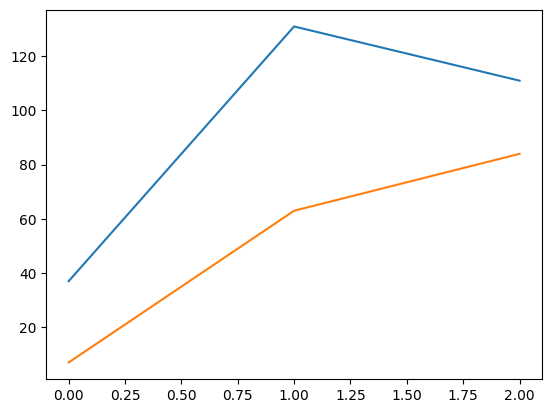

In [51]:
p_values = range(p)
#plt.scatter(p_values, qaoa_calls_bfgs)
plt.plot(p_values, qaoa_calls_cobyla)
plt.plot(p_values, qaoa_calls_bfgs)
plt.show()

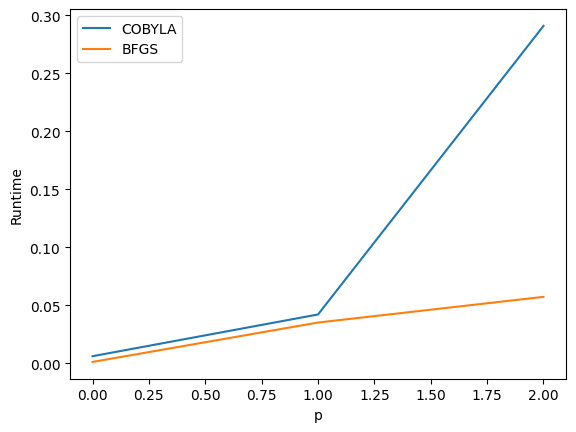

In [58]:
N = int(input('N = '))
p = int(input('p = '))
G = nx.erdos_renyi_graph(N, 0.5)  # Random graph w/ 0.5 edge probability
ising_model = mc.get_maxcut_terms(G)
init_gamma, init_beta = np.random.rand(2, p)
qaoa_calls_cobyla = []
qaoa_calls_bfgs = []
for n in range(p):
    cobyla_dict = QAOA_run(ising_model, N, n, init_gamma, init_beta, "COBYLA")
    qaoa_calls_cobyla.append(cobyla_dict['runtime'])
    bfgs_dict = QAOA_run(ising_model, N, n, init_gamma, init_beta, "BFGS")
    qaoa_calls_bfgs.append(bfgs_dict['runtime'])
#QAOA_run(ising_model, N, p, init_gamma, init_beta, "COBYLA")

p_values = range(p)
fig, ax = plt.subplots()
ax.plot(p_values, qaoa_calls_cobyla, label="COBYLA") 
ax.plot(p_values, qaoa_calls_bfgs, label="BFGS")
ax.set_xlabel("p") #x軸に名前を付ける
ax.set_ylabel("Runtime") #y軸に名前を付ける
ax.legend() #グラフに名前を付ける
plt.show() #表示

#Next exercise is to add labes for x-axis and y-axis.

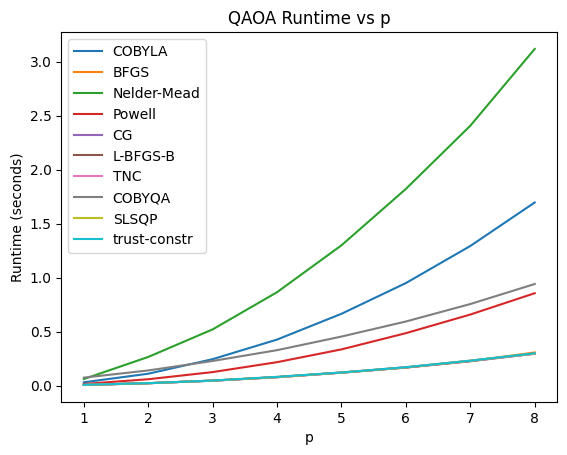

In [111]:
N = int(input('N = '))
p_max = int(input('p = '))
ising_model = np.array([])  # Replace with your actual Ising model
'''
ising_model = np.array([]) は、空の NumPy 配列を作成しています。
これは、Ising モデルの項を格納するためのプレースホルダーとして使用されています。
実際には、Ising モデルの具体的な項（スピン相互作用と外部磁場の項など）を格納する
ための配列を定義する必要があります。
'''
optimizer_method1 = "COBYLA"
optimizer_method2 = "BFGS"
optimizer_method3 = "Nelder-Mead"
optimizer_method4 = "Powell"
optimizer_method5 = "CG"
#optimizer_method6 = "Newton-CG"
optimizer_method7 = "L-BFGS-B"
optimizer_method8 = "TNC"
optimizer_method9 = "COBYQA"
optimizer_method10 = "SLSQP"
optimizer_method11 = "trust-constr"
#optimizer_method12 = "dogleg"
#optimizer_method13 = "trust-ncg"
#optimizer_method14 = "trust-exact"
#optimizer_method15 = "trust-krylov"
#optimizer_options = {"rhobeg": 0.01 / N}
mixer = "x"

# Initialize gamma and beta with some values
p_values = []
for p in range(1,p_max+1):
    p_values.append(p)
runtimes1 = []
runtimes2 = []
runtimes3 = []
runtimes4 = []
runtimes5 = []
#runtimes6 = []
runtimes7 = []
runtimes8 = []
runtimes9 = []
runtimes10 = []
runtimes11 = []
#runtimes12 = []
#runtimes13 = []
#runtimes14 = []
#runtimes15 = []

for p in p_values:
    init_gamma = np.random.rand(p)
    init_beta = np.random.rand(p)
    runtimes1.append(QAOA_run(ising_model, N, p, init_gamma, init_beta, optimizer_method1)["runtime"])
    runtimes2.append(QAOA_run(ising_model, N, p, init_gamma, init_beta, optimizer_method2)["runtime"])
    runtimes3.append(QAOA_run(ising_model, N, p, init_gamma, init_beta, optimizer_method3)["runtime"])
    runtimes4.append(QAOA_run(ising_model, N, p, init_gamma, init_beta, optimizer_method4)["runtime"])
    runtimes5.append(QAOA_run(ising_model, N, p, init_gamma, init_beta, optimizer_method5)["runtime"])
    #runtimes6.append(QAOA_run(ising_model, N, p, init_gamma, init_beta, optimizer_method6)["runtime"])
    runtimes7.append(QAOA_run(ising_model, N, p, init_gamma, init_beta, optimizer_method7)["runtime"])
    runtimes8.append(QAOA_run(ising_model, N, p, init_gamma, init_beta, optimizer_method8)["runtime"])
    runtimes9.append(QAOA_run(ising_model, N, p, init_gamma, init_beta, optimizer_method9)["runtime"])
    runtimes10.append(QAOA_run(ising_model, N, p, init_gamma, init_beta, optimizer_method10)["runtime"])
    runtimes11.append(QAOA_run(ising_model, N, p, init_gamma, init_beta, optimizer_method11)["runtime"])
    #runtimes12.append(QAOA_run(ising_model, N, p, init_gamma, init_beta, optimizer_method12)["runtime"])
    #runtimes13.append(QAOA_run(ising_model, N, p, init_gamma, init_beta, optimizer_method13)["runtime"])
    #runtimes14.append(QAOA_run(ising_model, N, p, init_gamma, init_beta, optimizer_method14)["runtime"])
    #runtimes15.append(QAOA_run(ising_model, N, p, init_gamma, init_beta, optimizer_method15)["runtime"])

# Plotting p vs runtime
plt.plot(p_values, runtimes1, label="COBYLA")
plt.plot(p_values, runtimes2, label="BFGS")
plt.plot(p_values, runtimes3, label="Nelder-Mead")
plt.plot(p_values, runtimes4, label="Powell")
plt.plot(p_values, runtimes5, label="CG")
#plt.plot(p_values, runtimes6, label="Newton-CG")
plt.plot(p_values, runtimes7, label="L-BFGS-B")
plt.plot(p_values, runtimes8, label="TNC")
plt.plot(p_values, runtimes9, label="COBYQA")
plt.plot(p_values, runtimes10, label="SLSQP")
plt.plot(p_values, runtimes11, label="trust-constr")
#plt.plot(p_values, runtimes12, label="dogleg")
#plt.plot(p_values, runtimes13, label="trust-ncg")
#plt.plot(p_values, runtimes14, label="trust-exact")
#plt.plot(p_values, runtimes15, label="trust-krylov")
plt.xlabel('p')
plt.ylabel('Runtime (seconds)')
plt.title('QAOA Runtime vs p')
plt.legend()
plt.show()

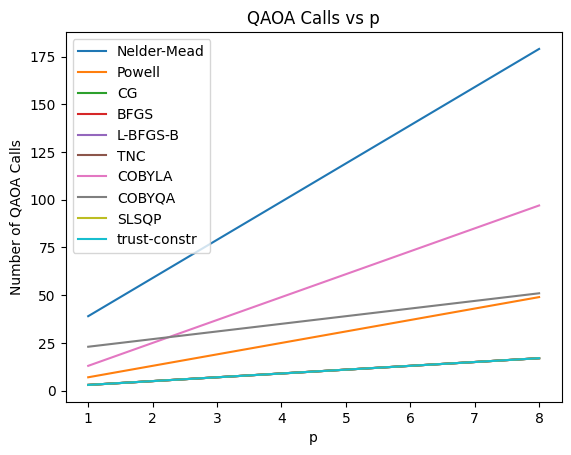

In [112]:
# 依存する関数とクラス（疑似コードとして定義）
from qokit.fur.qaoa_simulator_base import QAOAFastSimulatorBase, TermsType
import qokit.maxcut as mc

# グラフの描画
def plot_qaoa_calls_vs_p(N: int, p_values: list[int], ising_model: TermsType):
    qaoa_calls_neldermead = []
    qaoa_calls_powell = []
    qaoa_calls_cg = []
    qaoa_calls_bfgs = []
    qaoa_calls_lbfgsb = []
    qaoa_calls_tnc = []
    qaoa_calls_cobyla = []
    qaoa_calls_cobyqa = []
    qaoa_calls_slsqp = []
    qaoa_calls_trustconstr = []

    for p in p_values:
        init_gamma = np.random.rand(p)
        init_beta = np.random.rand(p)

        # Nelder-Mead
        optimizer_method_neldermead = "Nelder-Mead"
        result_neldermead = QAOA_run(
            ising_model=ising_model,
            N=N,
            p=p,
            init_gamma=init_gamma,
            init_beta=init_beta,
            optimizer_method=optimizer_method_neldermead,
        )
        qaoa_calls_neldermead.append(result_neldermead["num_QAOA_calls"])

        # Powell
        optimizer_method_powell = "Powell"
        result_powell = QAOA_run(
            ising_model=ising_model,
            N=N,
            p=p,
            init_gamma=init_gamma,
            init_beta=init_beta,
            optimizer_method=optimizer_method_powell,
        )
        qaoa_calls_powell.append(result_powell["num_QAOA_calls"])

        # CG
        optimizer_method_cg = "CG"
        result_cg = QAOA_run(
            ising_model=ising_model,
            N=N,
            p=p,
            init_gamma=init_gamma,
            init_beta=init_beta,
            optimizer_method=optimizer_method_cg,
        )
        qaoa_calls_cg.append(result_cg["num_QAOA_calls"])

        # BFGS
        optimizer_method_bfgs = "BFGS"
        result_bfgs = QAOA_run(
            ising_model=ising_model,
            N=N,
            p=p,
            init_gamma=init_gamma,
            init_beta=init_beta,
            optimizer_method=optimizer_method_bfgs,
        )
        qaoa_calls_bfgs.append(result_bfgs["num_QAOA_calls"])

        # L-BFGS-B
        optimizer_method_lbfgsb = "L-BFGS-B"
        result_lbfgsb = QAOA_run(
            ising_model=ising_model,
            N=N,
            p=p,
            init_gamma=init_gamma,
            init_beta=init_beta,
            optimizer_method=optimizer_method_lbfgsb,
        )
        qaoa_calls_lbfgsb.append(result_lbfgsb["num_QAOA_calls"])

        # TNC
        optimizer_method_tnc = "TNC"
        result_tnc = QAOA_run(
            ising_model=ising_model,
            N=N,
            p=p,
            init_gamma=init_gamma,
            init_beta=init_beta,
            optimizer_method=optimizer_method_tnc,
        )
        qaoa_calls_tnc.append(result_tnc["num_QAOA_calls"])

        # COBYLA
        optimizer_method_cobyla = "COBYLA"
        result_cobyla = QAOA_run(
            ising_model=ising_model,
            N=N,
            p=p,
            init_gamma=init_gamma,
            init_beta=init_beta,
            optimizer_method=optimizer_method_cobyla,
        )
        qaoa_calls_cobyla.append(result_cobyla["num_QAOA_calls"])

        # COBYQA
        optimizer_method_cobyqa = "COBYQA"
        result_cobyqa = QAOA_run(
            ising_model=ising_model,
            N=N,
            p=p,
            init_gamma=init_gamma,
            init_beta=init_beta,
            optimizer_method=optimizer_method_cobyqa,
        )
        qaoa_calls_cobyqa.append(result_cobyqa["num_QAOA_calls"])

        # SLSQP
        optimizer_method_slsqp = "SLSQP"
        result_slsqp = QAOA_run(
            ising_model=ising_model,
            N=N,
            p=p,
            init_gamma=init_gamma,
            init_beta=init_beta,
            optimizer_method=optimizer_method_slsqp,
        )
        qaoa_calls_slsqp.append(result_slsqp["num_QAOA_calls"])

        # trust-constr
        optimizer_method_trustconstr = "trust-constr"
        result_trustconstr = QAOA_run(
            ising_model=ising_model,
            N=N,
            p=p,
            init_gamma=init_gamma,
            init_beta=init_beta,
            optimizer_method=optimizer_method_trustconstr,
        )
        qaoa_calls_trustconstr.append(result_trustconstr["num_QAOA_calls"])

    plt.plot(p_values, qaoa_calls_neldermead, label="Nelder-Mead")
    plt.plot(p_values, qaoa_calls_powell, label="Powell")
    plt.plot(p_values, qaoa_calls_cg, label="CG")
    plt.plot(p_values, qaoa_calls_bfgs, label="BFGS")
    plt.plot(p_values, qaoa_calls_lbfgsb, label="L-BFGS-B")
    plt.plot(p_values, qaoa_calls_tnc, label="TNC")
    plt.plot(p_values, qaoa_calls_cobyla, label="COBYLA")
    plt.plot(p_values, qaoa_calls_cobyqa, label="COBYQA")
    plt.plot(p_values, qaoa_calls_slsqp, label="SLSQP")
    plt.plot(p_values, qaoa_calls_trustconstr, label="trust-constr")
    plt.xlabel('p')
    plt.ylabel('Number of QAOA Calls')
    plt.title('QAOA Calls vs p')
    plt.legend()
    #plt.grid(True)
    plt.show()

# 実行
N = int(input('N = '))  # 量子ビット数
p_max = int(input('p = '))
p_values = list(range(1, p_max + 1))
ising_model = np.array([])  # イジングモデル（適切な値に置き換える）
plot_qaoa_calls_vs_p(N, p_values, ising_model)

[(-0.9765915026764698, (0, 1)), (0.35321482938229054, (0, 2)), (-0.9799184226059667, (0, 3)), (0.2810859384937534, (0, 4)), (0.2071708216632273, (0, 5)), (0.27730018649207744, (1, 2)), (0.572585408380921, (1, 3)), (-0.29701713526466356, (1, 4)), (-0.5479998925932628, (1, 5)), (-0.6850504025704565, (2, 3)), (0.015037352144340765, (2, 4)), (-0.42481168378443757, (2, 5)), (-0.8926105209769413, (3, 4)), (0.8873541581203439, (3, 5)), (-0.7180599264634162, (4, 5))]


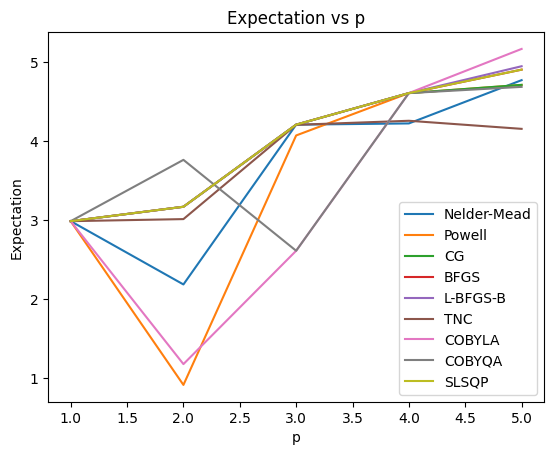

In [14]:
# これは未完成のコード
# グラフの描画
from QAOA_simulator import QAOA_run
from matplotlib import pyplot as plt
import numpy as np
import random

def plot_expectation_vs_p(N: int, p_values: list[int], ising_model):
    optimizer_method_list = ["Nelder-Mead", "Powell", "CG", "BFGS", "L-BFGS-B", "TNC", "COBYLA", "COBYQA", "SLSQP"] # Create a list of optimizer methods
    expectations_dict = dict() # Create an empty dictionary
    for optimizer_method in optimizer_method_list:
        expectations_dict[optimizer_method] = [] # Create an empty list to store the expectation values for each optimizer


    for p in p_values:
        init_gamma = np.random.rand(p)
        init_beta = np.random.rand(p)

        # Do QAOA for each optimizer
        for optimizer_method in optimizer_method_list:
            results_dict = QAOA_run(
                ising_model=ising_model,
                N=N,
                p=p,
                init_gamma=init_gamma,
                init_beta=init_beta,
                optimizer_method=optimizer_method,
            )
            expectations_list = expectations_dict[optimizer_method]
            expectations_list.append(results_dict["expectation"])
        

    for optimizer_method in optimizer_method_list:
        expectations_list = expectations_dict[optimizer_method]
        plt.plot(p_values, expectations_list, label=optimizer_method)

    plt.xlabel('p')
    plt.ylabel('Expectation')
    plt.title('Expectation vs p')
    plt.legend()
    plt.show()


# 実行
N = int(input('N = '))  # 量子ビット数
p_max = int(input('p = '))
p_values = list(range(1, p_max + 1))
ising_model = generate_random_ising_model(N)  # イジング模型
print(str(ising_model))
plot_expectation_vs_p(N, p_values, ising_model)